In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Data Visualization
import matplotlib.pyplot as plt              
import seaborn as sns

# Train/Test Split
from sklearn.model_selection import train_test_split     

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

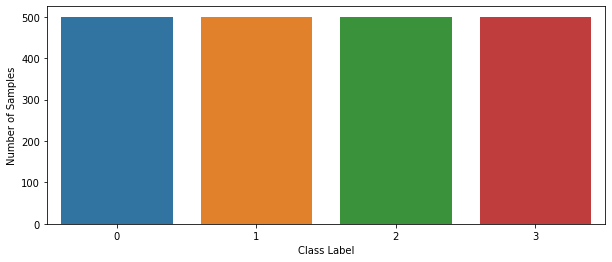

In [7]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x ='price_range', data=df)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

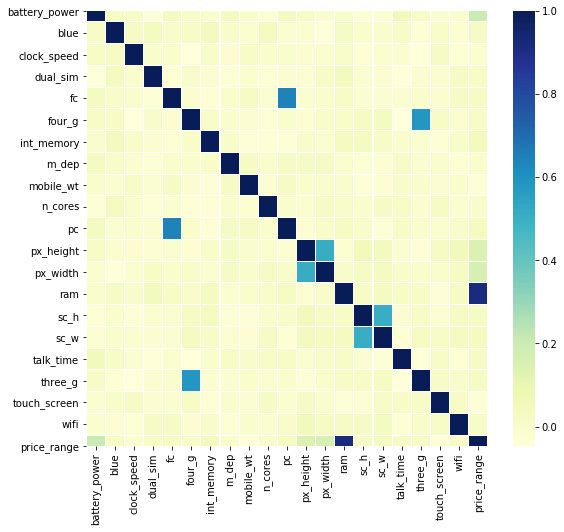

In [8]:
corr_mat = df.corr()

f, ax = plt.subplots(figsize = (9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap = "YlGnBu", linewidths = 0.1) 

In [9]:
corr_mat['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [10]:
# Absolute
corr_mat['price_range'] = abs(corr_mat['price_range'])
sorted_corr_mat = corr_mat.sort_values(by=['price_range'], ascending=False)
sorted_corr_mat['price_range']

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

In [11]:
# Selecting features with correlation more than 0.022
features = ['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'touch_screen', 'mobile_wt', 'three_g', 'sc_h', 'price_range']
df = df[features]
df

,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,touch_screen,mobile_wt,three_g,sc_h,price_range
0,2549,842,756,20,7,7,2,0,188,0,9,1
1,2631,1021,1988,905,53,3,6,1,136,1,17,2
2,2603,563,1716,1263,41,2,6,1,145,1,11,2
3,2769,615,1786,1216,10,8,9,0,131,1,16,2
4,1411,1821,1212,1208,44,2,14,1,141,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,2,4,14,1,106,1,13,0
1996,2032,1965,1965,915,39,10,3,1,187,1,11,2
1997,3057,1911,1632,868,36,1,3,1,108,1,9,3
1998,869,1512,670,336,46,10,5,1,145,1,18,0


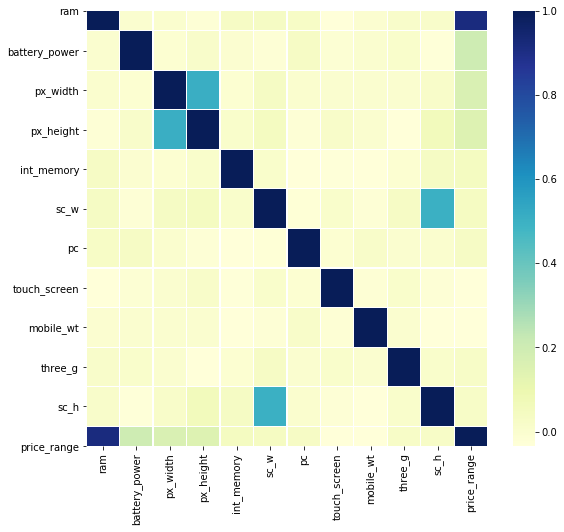

In [12]:
corr_mat = df.corr()

f, ax = plt.subplots(figsize = (9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)

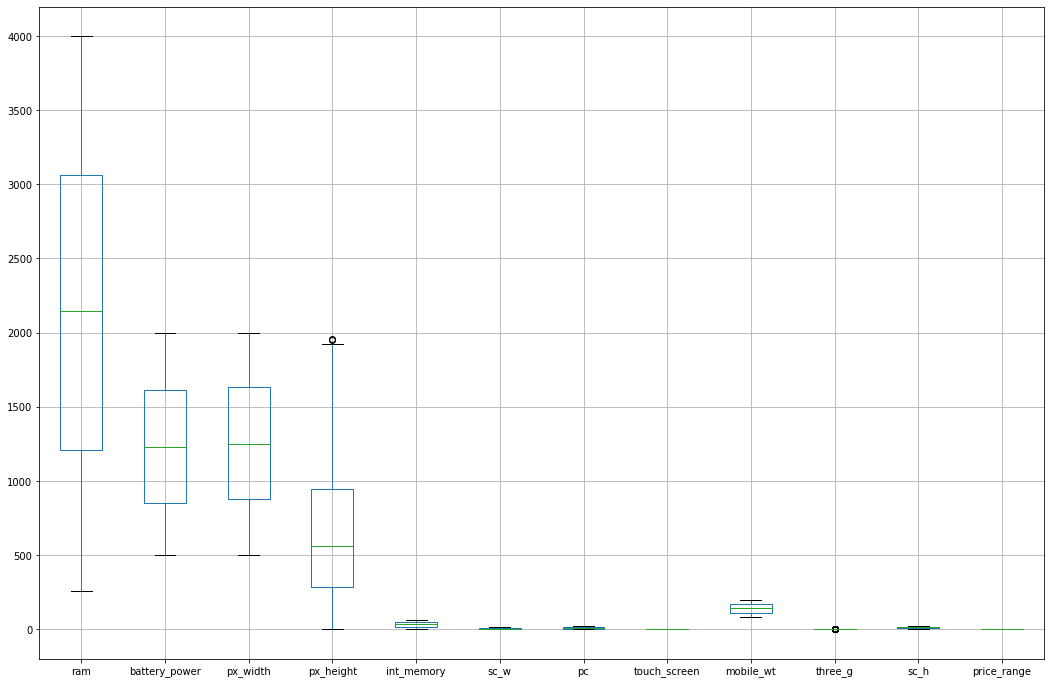

In [13]:
# Check outlier
f, ax = plt.subplots(figsize = (18, 12)) 
df.boxplot()

In [14]:
df.sort_values(by=['px_height'], ascending=False).head(10)

,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,touch_screen,mobile_wt,three_g,sc_h,price_range
1771,1622,1230,1963,1960,48,17,2,1,111,1,18,2
988,2973,1413,1994,1949,45,8,6,0,104,1,17,3
894,1329,1497,1933,1920,32,1,9,1,92,1,6,2
260,1027,754,1928,1914,59,3,10,0,178,1,6,1
1163,1783,1930,1920,1901,16,3,12,0,186,0,17,2
1827,3779,1692,1904,1899,2,3,17,1,106,1,9,3
1017,2438,1221,1976,1895,28,11,7,1,139,1,13,3
1397,629,717,1981,1878,14,15,6,0,99,1,16,0
1615,3930,1086,1976,1874,24,1,19,1,135,1,17,3
305,955,1348,1942,1869,52,11,20,1,98,1,18,1


In [15]:
# Separates label from dataset
Target = np.array(df.pop('price_range'))      
Data   = np.array(df)
X_train, X_test, Y_train, Y_test = train_test_split(Data, Target, test_size=0.2, random_state=42, stratify=Target)

In [16]:
# Metric Evaluation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def get_metrics(true_labels, predicted_labels):
    acc = np.round(accuracy_score(true_labels, predicted_labels), 4)
    prec = np.round(precision_score(true_labels, predicted_labels, average='weighted'), 4)
    recall = np.round(recall_score(true_labels, predicted_labels, average='weighted'), 4)
    f1 = np.round(f1_score(true_labels, predicted_labels, average='weighted'), 4)
    return [acc, prec, recall, f1]

In [17]:
final_score_headers = ['Model','Acc','Precision','Recall','F1']
final_score = pd.DataFrame(columns=final_score_headers)

In [18]:
from sklearn.tree import DecisionTreeClassifier

acc = []
max_acc = 0
final_rows = []
x_axis_DT = range(3,12)
for i in x_axis_DT:
    DT = DecisionTreeClassifier(criterion = "gini",
                                random_state = 100,
                                max_depth=i, 
                                min_samples_leaf=5)
    DT.fit(X_train, Y_train)
    y_pred = DT.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)*100
    if accuracy > max_acc:
        final_rows = ['DT'] + get_metrics(Y_test, y_pred)
        max_acc = accuracy
    acc.append(accuracy)
    print ("Accuracy for Decision Tree for max depth ",i," is: ", accuracy)

print ("Highest accuracy for Decision Tree is: ", max(acc))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for Decision Tree for max depth  3  is:  74.5
Accuracy for Decision Tree for max depth  4  is:  79.25
Accuracy for Decision Tree for max depth  5  is:  83.0
Accuracy for Decision Tree for max depth  6  is:  86.5
Accuracy for Decision Tree for max depth  7  is:  86.0
Accuracy for Decision Tree for max depth  8  is:  87.25
Accuracy for Decision Tree for max depth  9  is:  86.75
Accuracy for Decision Tree for max depth  10  is:  87.0
Accuracy for Decision Tree for max depth  11  is:  87.0
Highest accuracy for Decision Tree is:  87.25


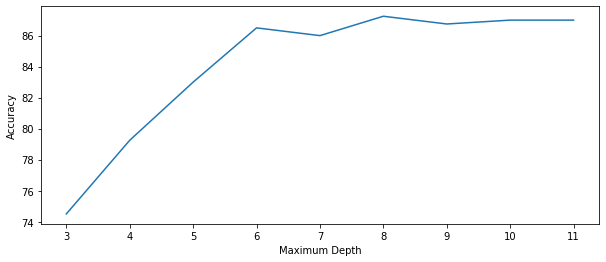

In [19]:
plt.subplots(figsize = (10, 4))
plt.plot(x_axis_DT, acc)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier 

acc_KNN = []
max_acc = 0
final_rows = []
x_axis_KNN = range(5,31)
for i in x_axis_KNN:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)*100
    if accuracy > max_acc:
        final_rows = ['KNN'] + get_metrics(Y_test, y_pred)
        max_acc = accuracy
    acc_KNN.append(accuracy)
    print ("Accuracy for KNN for k = ",i," is: ", accuracy)

print ("Highest accuracy for KNN is: ", max(acc_KNN))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for KNN for k =  5  is:  93.5
Accuracy for KNN for k =  6  is:  93.0
Accuracy for KNN for k =  7  is:  94.25
Accuracy for KNN for k =  8  is:  94.75
Accuracy for KNN for k =  9  is:  95.75
Accuracy for KNN for k =  10  is:  95.0
Accuracy for KNN for k =  11  is:  95.25
Accuracy for KNN for k =  12  is:  95.0
Accuracy for KNN for k =  13  is:  95.0
Accuracy for KNN for k =  14  is:  94.5
Accuracy for KNN for k =  15  is:  94.25
Accuracy for KNN for k =  16  is:  94.0
Accuracy for KNN for k =  17  is:  94.0
Accuracy for KNN for k =  18  is:  94.25
Accuracy for KNN for k =  19  is:  94.5
Accuracy for KNN for k =  20  is:  95.0
Accuracy for KNN for k =  21  is:  94.5
Accuracy for KNN for k =  22  is:  94.25
Accuracy for KNN for k =  23  is:  94.5
Accuracy for KNN for k =  24  is:  94.0
Accuracy for KNN for k =  25  is:  94.25
Accuracy for KNN for k =  26  is:  93.75
Accuracy for KNN for k =  27  is:  94.25
Accuracy for KNN for k =  28  is:  94.25
Accuracy for KNN for k =  29  is: 

In [21]:
from sklearn.ensemble import RandomForestClassifier

acc_RF = []
max_acc = 0
final_rows = []
x_axis_RF = range(5,31)
for i in range(5,31):
    RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    RF.fit(X_train, Y_train)
    y_pred = RF.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)*100
    if accuracy > max_acc:
        final_rows = ['RF'] + get_metrics(Y_test, y_pred)
        max_acc = accuracy
    acc_RF.append(accuracy)
    print ("Accuracy for Random Forest for estimator = ",i," is: ", accuracy) 

print ("Highest accuracy for Random Forest is: ", max(acc_RF))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for Random Forest for estimator =  5  is:  83.75
Accuracy for Random Forest for estimator =  6  is:  83.5
Accuracy for Random Forest for estimator =  7  is:  82.5
Accuracy for Random Forest for estimator =  8  is:  86.75
Accuracy for Random Forest for estimator =  9  is:  85.0
Accuracy for Random Forest for estimator =  10  is:  86.75
Accuracy for Random Forest for estimator =  11  is:  87.75
Accuracy for Random Forest for estimator =  12  is:  88.5
Accuracy for Random Forest for estimator =  13  is:  88.0
Accuracy for Random Forest for estimator =  14  is:  89.0
Accuracy for Random Forest for estimator =  15  is:  89.5
Accuracy for Random Forest for estimator =  16  is:  88.5
Accuracy for Random Forest for estimator =  17  is:  90.0
Accuracy for Random Forest for estimator =  18  is:  89.25
Accuracy for Random Forest for estimator =  19  is:  89.5
Accuracy for Random Forest for estimator =  20  is:  89.75
Accuracy for Random Forest for estimator =  21  is:  89.0
Accuracy for 

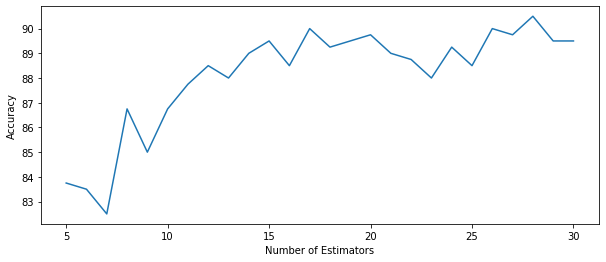

In [22]:
plt.subplots(figsize = (10, 4))
plt.plot(x_axis_RF, acc_RF)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [26]:
from sklearn import svm

#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
acc_SVM = []
max_acc = 0
final_rows = []
x_axis_SVM = [0.1, 1, 10, 100, 1000]
k = ['poly', 'rbf', 'sigmoid']
for k in k:
    for i in x_axis_SVM:
        SVM = svm.SVC(C= i, gamma='scale', kernel= k)
        SVM.fit(X_train, Y_train)
        y_pred = SVM.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)*100
        if accuracy > max_acc:
            final_rows = ['SVM'] + get_metrics(Y_test, y_pred)
            max_acc = accuracy
        acc_SVM.append(accuracy)
        print ("Accuracy for SVM for kernel = ",k," c = ",i," is: ", accuracy)

print ("Highest accuracy for SVM is: ", max(acc_SVM))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for SVM for kernel =  poly  c =  0.1  is:  94.5
Accuracy for SVM for kernel =  poly  c =  1  is:  96.75
Accuracy for SVM for kernel =  poly  c =  10  is:  98.0
Accuracy for SVM for kernel =  poly  c =  100  is:  98.5
Accuracy for SVM for kernel =  poly  c =  1000  is:  98.75
Accuracy for SVM for kernel =  rbf  c =  0.1  is:  93.0
Accuracy for SVM for kernel =  rbf  c =  1  is:  96.5
Accuracy for SVM for kernel =  rbf  c =  10  is:  97.5
Accuracy for SVM for kernel =  rbf  c =  100  is:  98.0
Accuracy for SVM for kernel =  rbf  c =  1000  is:  98.25
Accuracy for SVM for kernel =  sigmoid  c =  0.1  is:  13.25
Accuracy for SVM for kernel =  sigmoid  c =  1  is:  12.75
Accuracy for SVM for kernel =  sigmoid  c =  10  is:  12.0
Accuracy for SVM for kernel =  sigmoid  c =  100  is:  11.25
Accuracy for SVM for kernel =  sigmoid  c =  1000  is:  11.0
Highest accuracy for SVM is:  98.75


In [24]:
from xgboost import XGBClassifier

acc_XGB = []
max_acc = 0
final_rows = []
k_axis_XGB = range(30,40)
x_axis_XGB = range(30,40)
for k in k_axis_XGB:
    for i in x_axis_XGB:
        xgb = XGBClassifier(n_estimators= k, max_depth= i)
        xgb.fit(X_train, Y_train)
        y_pred = xgb.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)*100
        if accuracy > max_acc:
            final_rows = ['XGB'] + get_metrics(Y_test, y_pred)
            max_acc = accuracy
        acc_XGB.append(accuracy)
        print ("Accuracy for XGB for k = ",k," c = ",i," is: ", accuracy)

print ("Highest accuracy for XGB is: ", max(acc_XGB))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for XGB for k =  30  c =  30  is:  92.25
Accuracy for XGB for k =  30  c =  31  is:  92.25
Accuracy for XGB for k =  30  c =  32  is:  92.25
Accuracy for XGB for k =  30  c =  33  is:  92.25
Accuracy for XGB for k =  30  c =  34  is:  92.25
Accuracy for XGB for k =  30  c =  35  is:  92.25
Accuracy for XGB for k =  30  c =  36  is:  92.25
Accuracy for XGB for k =  30  c =  37  is:  92.25
Accuracy for XGB for k =  30  c =  38  is:  92.25
Accuracy for XGB for k =  30  c =  39  is:  92.25
Accuracy for XGB for k =  31  c =  30  is:  92.5
Accuracy for XGB for k =  31  c =  31  is:  92.5
Accuracy for XGB for k =  31  c =  32  is:  92.5
Accuracy for XGB for k =  31  c =  33  is:  92.5
Accuracy for XGB for k =  31  c =  34  is:  92.5
Accuracy for XGB for k =  31  c =  35  is:  92.5
Accuracy for XGB for k =  31  c =  36  is:  92.5
Accuracy for XGB for k =  31  c =  37  is:  92.5
Accuracy for XGB for k =  31  c =  38  is:  92.5
Accuracy for XGB for k =  31  c =  39  is:  92.5
Accuracy f

In [25]:
print("Segara Bhagas Dagsapurwa - 05111840000037 - KELAS KK E\nKresna Adhi Pramana - 05111840000072 - KELAS KK E\n")

final_score = final_score.sort_values(by=['Acc'], ascending=False)
final_score.index = np.arange(1, len(final_score) + 1)

print(final_score)

print("\nHasil terbaik didapatkan dari model dengan metode SVM")

Segara Bhagas Dagsapurwa - 05111840000037 - KELAS KK E
Kresna Adhi Pramana - 05111840000072 - KELAS KK E

  Model     Acc  Precision  Recall      F1
1   SVM  0.9875     0.9878  0.9875  0.9875
2   KNN  0.9575     0.9573  0.9575  0.9573
3   XGB  0.9275     0.9296  0.9275  0.9280
4    RF  0.9050     0.9043  0.9050  0.9045
5    DT  0.8725     0.8762  0.8725  0.8732

Hasil terbaik didapatkan dari model dengan metode SVM
